In [2]:
# Updated logistic regression training + plotting with changed dataset values
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass: compute prediction and cost (with numeric stability)
def forward(params, X, Y):
    w = params["w"]        # shape (d,1)
    w_0 = params["w_0"]    # scalar
    n = X.shape[1]

    Z = np.dot(w.T, X) + w_0   # shape (1, n)
    A = sigmoid(Z)

    # numeric stability for log
    eps = 1e-12
    A_clipped = np.clip(A, eps, 1 - eps)

    cost = (-1 / n) * np.sum(Y * np.log(A_clipped) + (1 - Y) * np.log(1 - A_clipped))
    return A, cost

# Backward pass: compute gradients
def backprop(X, Y, A):
    n = X.shape[1]
    dw = (1 / n) * np.dot(X, (A - Y).T)   # shape (d,1)
    dw_0 = (1 / n) * np.sum(A - Y)        # scalar
    return dw, dw_0

# Optimization loop (standard gradient descent)
def optimize(params, X, Y, num_iterations, l_rate, print_every=100):
    costs = []
    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, dw_0 = backprop(X, Y, A)

        # parameter updates (no accidental normalization of bias)
        params["w"] = params["w"] - l_rate * dw
        params["w_0"] = params["w_0"] - l_rate * dw_0

        if i % print_every == 0:
            print(f"Iteration {i}: Cost = {cost:.6f}, ||dw|| = {np.linalg.norm(dw):.6f}, dw_0 = {dw_0:.6f}")

        costs.append(cost)
    return params, costs

# --- Changed data as requested ---
# New data: (2,1)->0 and (4,3)->1
X = np.array([[2, 4],
              [1, 3]])  # shape (2, 2)
Y = np.array([[0, 1]])  # shape (1, 2)

# Initialize weights and bias (small random init)
d = X.shape[0]
np.random.seed(42)
w = np.random.randn(d, 1) * 0.01
params = {"w": w, "w_0": 0.0}

# Train model
trained_params, cost_history = optimize(params, X, Y, num_iterations=1000, l_rate=0.1, print_every=200)

# --- Extract trained parameters ---
w = trained_params["w"].reshape(-1)   # shape (2,)
w0 = float(trained_params["w_0"])

X_pts = X.T
Y_pts = Y.flatten()

# --- Distance and foot of perpendicular ---
w_norm = np.linalg.norm(w)
signed_dist = w0 / w_norm if w_norm != 0 else 0.0
perp_dist = abs(signed_dist)

foot = -(w0 / (w_norm**2)) * w if w_norm != 0 else np.array([0.0, 0.0])

print(f"\nTrained parameters: w = {w}, w0 = {w0:.6f}")
print(f"||w|| = {w_norm:.6f}")
print(f"Signed distance from origin to boundary = {signed_dist:.6f}")
print(f"Perpendicular distance from origin to boundary = {perp_dist:.6f}")
print(f"Foot of perpendicular = ({foot[0]:.4f}, {foot[1]:.4f})")


Iteration 0: Cost = 0.691375, ||dw|| = 0.695116, dw_0 = 0.003034
Iteration 200: Cost = 0.226220, ||dw|| = 0.058367, dw_0 = 0.071435
Iteration 400: Cost = 0.125303, ||dw|| = 0.034291, dw_0 = 0.041792
Iteration 600: Cost = 0.084720, ||dw|| = 0.023742, dw_0 = 0.028888
Iteration 800: Cost = 0.063478, ||dw|| = 0.018012, dw_0 = 0.021897

Trained parameters: w = [-0.87733876  3.90811528], w0 = -4.791804
||w|| = 4.005382
Signed distance from origin to boundary = -1.196341
Perpendicular distance from origin to boundary = 1.196341
Foot of perpendicular = (-0.2620, 1.1673)


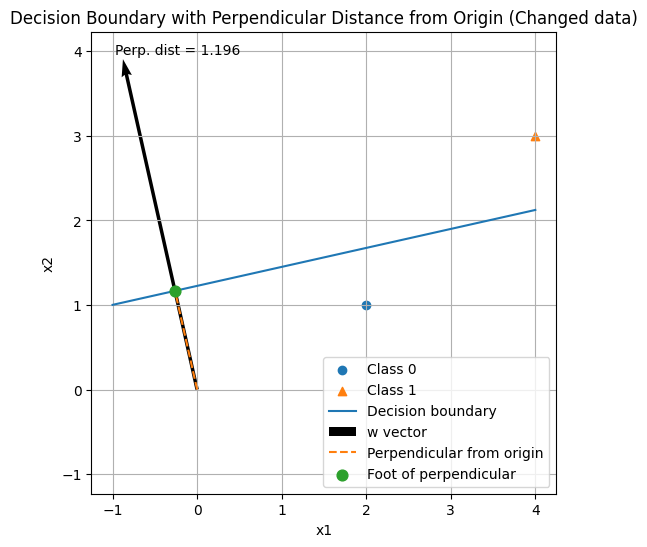

In [4]:

# --- Plot ---
plt.figure(figsize=(6,6))

# Data points (no explicit colors set to follow chart guidelines)
plt.scatter(X_pts[Y_pts==0,0], X_pts[Y_pts==0,1], label='Class 0', marker='o')
plt.scatter(X_pts[Y_pts==1,0], X_pts[Y_pts==1,1], label='Class 1', marker='^')

# Decision boundary: w1*x + w2*y + w0 = 0
x_min = min(X_pts[:,0].min(), -1)
x_max = max(X_pts[:,0].max(), 4)
x_vals = np.linspace(x_min, x_max, 200)
if abs(w[1]) > 1e-12:
    y_vals = -(w[0]*x_vals + w0)/w[1]
    plt.plot(x_vals, y_vals, '-', label='Decision boundary')
else:
    x_line = -w0 / w[0] if abs(w[0])>1e-12 else 0.0
    plt.axvline(x_line, label='Decision boundary')

# Weight vector (from origin)
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, label='w vector')

# Perpendicular from origin to decision boundary
plt.plot([0, foot[0]], [0, foot[1]], '--', label='Perpendicular from origin')
plt.scatter([foot[0]], [foot[1]], s=60, zorder=5, label='Foot of perpendicular')

# Text annotation
plt.text(0.05, 0.95, f"Perp. dist = {perp_dist:.3f}", transform=plt.gca().transAxes)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary with Perpendicular Distance from Origin (Changed data)")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='best')
plt.show()
